## GPM GMI (GPROF) Radiometer Precipitation Profiling L2A 1.5 hours 13 km V07 (GPM_2AGPROFGPMGMI)

File-type: 	2A.GPM.GMI.GPROF2021v1.20150104-S002552-E015822.004829.V07A.HDF5

In [278]:
cd H:\BIPARJOY\GPM\GPM GMI (GPROF) Radiometer Precipitation Profiling L2A 1.5 hours 13 km V07 (GPM_2AGPROFGPMGMI) at GES DISC\19

H:\BIPARJOY\GPM\GPM GMI (GPROF) Radiometer Precipitation Profiling L2A 1.5 hours 13 km V07 (GPM_2AGPROFGPMGMI) at GES DISC\19


In [152]:
import numpy as np
import h5py                  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

In [283]:
# open the file, select the precipRate variables plus latitude and longitude
file = r'2A.GPM.GMI.GPROF2021v1.20230619-S121921-E135153.052876.V07A.HDF5'
f = h5py.File(file,"r")
cwp   = f['/S1/surfacePrecipitation']
# CloudLiquid   = f['/KuGMI/cloudLiqWaterCont']
lon  = f["/S1/Latitude"]
lat  = f["/S1/Longitude"]
print('/KuGMI/cloudIceWaterCont dimension sizes are:',cwp.shape)
# print('/KuGMI/cloudLiqWaterCont dimension sizes are:',CloudLiquid.shape)

/KuGMI/cloudIceWaterCont dimension sizes are: (2961, 221)


In [284]:
# Read the data into numpy arrays and put NaN where FillValues are
cwpData = np.ndarray(shape=cwp.shape,dtype=float)
cwp.read_direct(cwpData)
np.place(cwpData, cwpData==cwp.attrs.get('_FillValue'), np.nan)

In [ ]:
# # 2-Dimensional Near-Surface Precipitation Rage
# CloudIceData = np.ndarray(shape=CloudIce.shape,dtype=float)
# CloudIce.read_direct(CloudIceData)
# np.place(CloudIceData, CloudIceData==CloudIce.attrs.get('_FillValue'), np.nan)

In [285]:
# Subset the 2-Dimensional variable over the eye of Typhoon Mangkhut
# Choose the range of the subset, e.g.:
#   170 rows in the along-track dimension,
#   All 49 elements in the cross-track dimension,
# start = 2150
# end = 2495
mysub = cwpData[:,:]
mylon = lon[:,:]
mylat = lat[:,:]

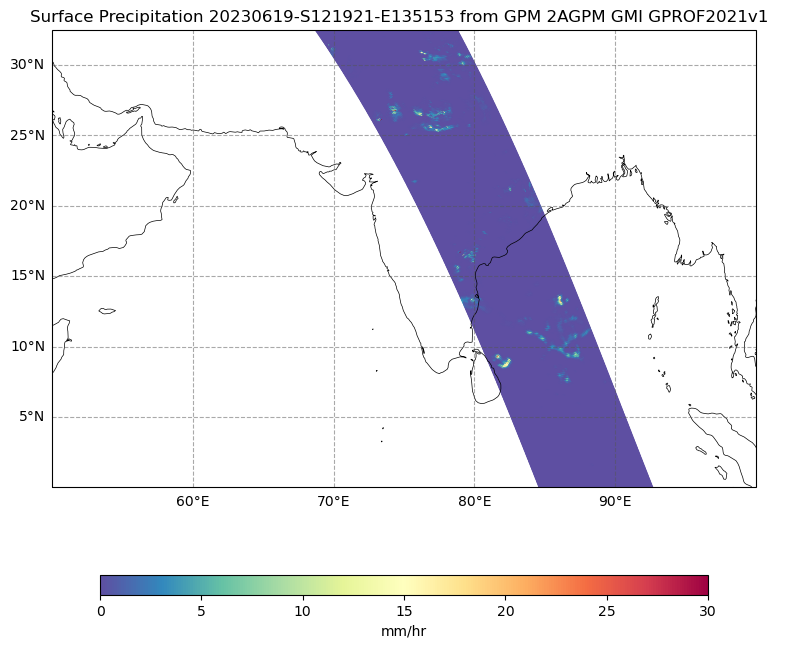

In [286]:
# Draw the subset of near-surface precipitation rate 
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([50,100,0,30])#67,90,15,35])#[66,71,16,20])
plt.title(f'Surface Precipitation {file[23:47]} from GPM 2AGPM GMI GPROF2021v1  ')

# Add coastlines and gridlines
ax.coastlines(resolution="50m",linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
                  linewidth=0.8,color='#555555',alpha=0.5,linestyle='--')
# Axis labels
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

# Plot the scatter diagram 
pp = plt.scatter(mylat, mylon,  c=mysub,vmin=0,vmax=30,s=2,
                 cmap=plt.cm.Spectral_r, transform=ccrs.PlateCarree())
# plt.plot(69.8,23.7)#, markersize=100,color='red')

# Add a colorbar to the bottom of the plot.
fig.subplots_adjust(bottom=0.18,left=0.06,right=0.94)
cbar_ax = fig.add_axes([0.12, 0.11, 0.76, 0.025])  
cbar = plt.colorbar(pp,cax=cbar_ax,orientation='horizontal')
cbar.set_label(label=cwp.attrs.get('units').decode('utf-8'),size=10)
plt.savefig(r'H:\BIPARJOY\GPM\GPM GMI (GPROF) Radiometer Precipitation Profiling L2A 1.5 hours 13 km V07 (GPM_2AGPROFGPMGMI) at GES DISC\19\\'+file+'_surfacePrecipitation.jpg')

In [240]:
np.nanmax(mysub)

82.83995056152344

In [287]:
np.nanmin(mysub)

0.0